In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 3
You will study some data related to the usage of a car.  
The dataset is located available with the lecture (`data/CarData.csv` in the main directory of the course, or online https://github.com/rmadar/lecture-python/blob/master/data/CarData.csv).

#### Step 1
Open the file and load it in a DataFrame (with pandas).  
List all the variables, their type and some basic information about them (min, mean, std, max, ...).

In [7]:
df = pd.read_csv('CarData.txt')

for c in df.columns:
    print(c, df[c].dtype, df[c].mean(), df[c].min(), df[c].max())

distance_Km float64 16.65964285714285 0.2 288.9
conso_L100km float64 5.872500000000001 3.6 11.7
duration_H float64 0.3485119047619045 0.0166666666666666 2.65
price_EuroL float64 1.432857142857141 1.34 1.47
dayTime_H int64 13.57857142857143 0 22
weekDay int64 3.7035714285714287 1 7
yearMonth int64 6.789285714285715 1 12


In [8]:
df.describe()

,distance_Km,conso_L100km,duration_H,price_EuroL,dayTime_H,weekDay,yearMonth
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,16.659643,5.872500,0.348512,1.432857,13.578571,3.703571,6.789286
std,37.412430,1.367228,0.367452,0.029275,4.271382,1.918030,5.197383
min,0.200000,3.600000,0.016667,1.340000,0.000000,1.000000,1.000000
25%,3.575000,4.975000,0.150000,1.420000,9.000000,2.000000,1.000000
50%,12.200000,5.600000,0.283333,1.440000,15.000000,4.000000,11.000000
75%,14.900000,6.300000,0.400000,1.450000,17.000000,5.000000,12.000000
max,288.900000,11.700000,2.650000,1.470000,22.000000,7.000000,12.000000


#### Step 2
Do the histograms and scatter plots of all the float type variables.  
What can you conclude about how they are distributed and related ?  
Hint : Don't hesitate to 'zoom in' to better see the denser parts

In [16]:
# Option 1
col_to_keep = []
for c in df.columns:
    if df[c].dtype == float:
        col_to_keep.append(c)
dfFloat = df[col_to_keep]

# Option 2
dfFloat = df.select_dtypes(float)
dfFloat.head()

,distance_Km,conso_L100km,duration_H,price_EuroL
0,15.5,5.6,0.550000,1.34
1,12.4,4.5,0.216667,1.45
2,4.5,4.0,0.133333,1.45
3,0.4,11.7,0.033333,1.45
4,0.5,10.6,0.066667,1.45


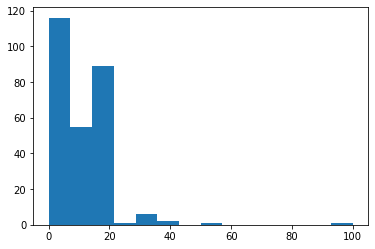

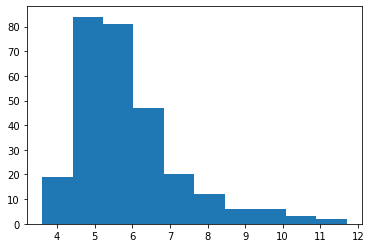

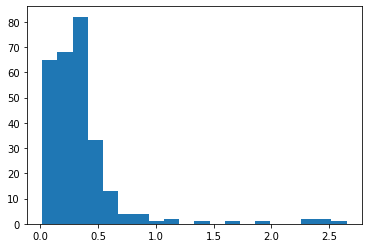

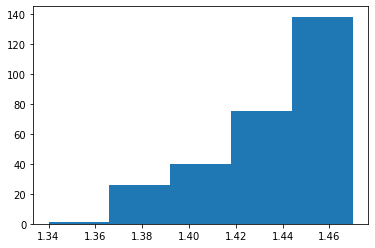

In [21]:
variables = ['distance_Km', 'conso_L100km', 'duration_H', 'price_EuroL']
binnings  = [np.linspace(0, 100, 15), None, 20, 5]
for v, b in zip(variables, binnings):
    plt.figure()
    plt.hist(dfFloat[v], bins=b)

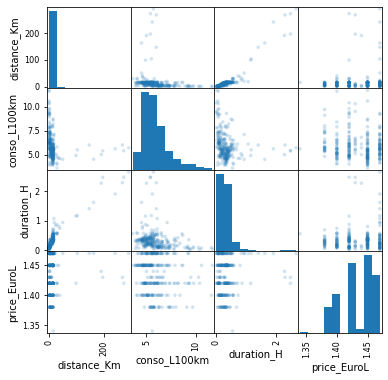

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(dfFloat, figsize=(6, 6), alpha=0.2, s=50, diagonal='hist');

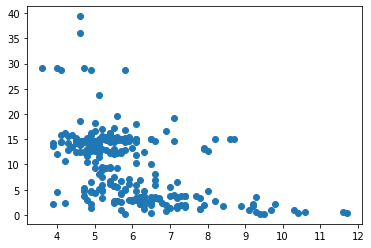

In [26]:
trips = dfFloat.distance_Km<50
c, d = dfFloat.conso_L100km[trips], dfFloat.distance_Km[trips]
plt.scatter(c, d);

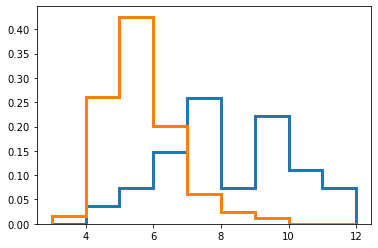

In [38]:
km = dfFloat.distance_Km
conso = dfFloat.conso_L100km
th = 2
plt.hist(conso[km<th], bins=np.linspace(3, 12, 10), histtype='step', linewidth=3, density=True)
plt.hist(conso[km>th], bins=np.linspace(3, 12, 10), histtype='step', linewidth=3, density=True);

#### Step 3
Lets focus on the variables related to the time of travel (hour, day and week). 
How are the travels distributed in time ?

#### Step 4
Fit the duration VS distance using scipy.  
You can split the distance range in two and fit them sepparatetly.  
Hint : I recommend to use polynomial functions of different degree for the fit.


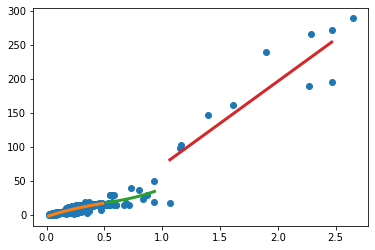

In [53]:
from scipy.optimize import curve_fit

def pol1(v, A, B, C):
    return A*np.exp(-v/B) + C

def fitPlotCond(mask):
    xL, yL = x[mask], y[mask]
    xLCont = np.linspace(xL.min(), xL.max(), 1000)
    pars, cov = curve_fit(pol1, xL, yL)
    plt.plot(xLCont, pol1(xLCont, *pars), linewidth=3);
     
x, y = df.duration_H, df.distance_Km
plt.plot(x, y, 'o');
for m in [(x>0) & (x<0.5), (x>0.5) & (x<1.0), (x>1.0) & (x<2.5)]:
    fitPlotCond(m)

#### Step 5 (optional)
Use any tool from scipy to measure the goodness of fit (something like chi2).